## Problem Statement 

#### Prepare a prediction model for profit of 50_startups data.

### Import all the required libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_50s = pd.read_csv("50_Startups.csv")
df_50s.head()

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
#Shape of the dataset:-
df_50s.shape

(50, 5)

#### This dataset have 50 rows and 5 variables.

In [4]:
##Checking datatypes:-
df_50s.dtypes

RandD_Spend        float64
Administration     float64
Marketing_Spend    float64
State               object
Profit             float64
dtype: object

In [5]:
##Statistical description of the data:-
df_50s.describe().T

,count,mean,std,min,25%,50%,75%,max
RandD_Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing_Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [6]:
##Checking null values:-
df_50s.isnull().sum()

RandD_Spend        0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

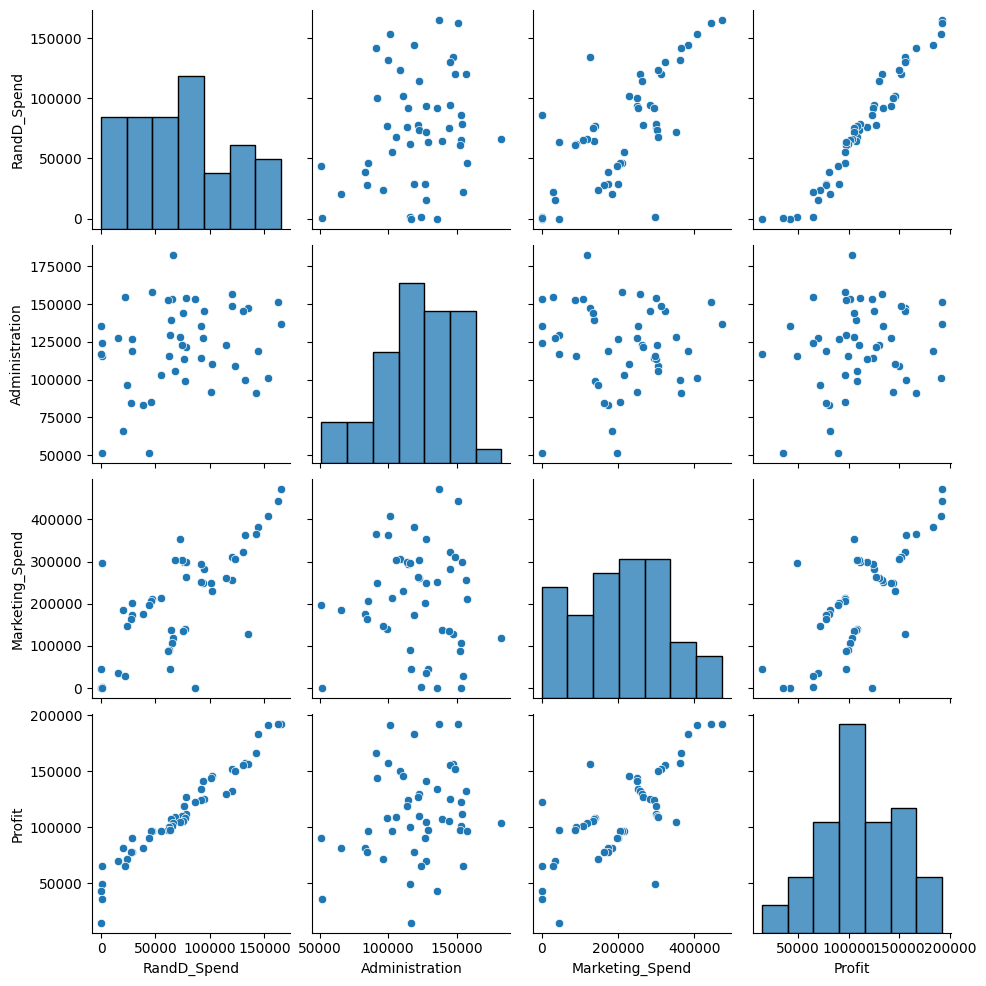

In [7]:
##Distribution of all the variables using pairplot:-
sns.pairplot(df_50s)

<AxesSubplot: >

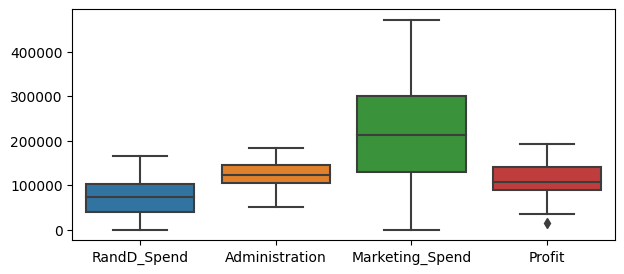

In [8]:
##Checking the outliers:-
plt.figure(figsize=(7,3))
sns.boxplot(data=df_50s)

#### From the above boxplot we can see that only profit column has one outlier below lower whisker.

In [9]:
#IQR Method used for remove outlier:-

Q1 = df_50s.quantile(0.25)

Q3 = df_50s.quantile(0.75)

IQR = Q3 - Q1

df1_50s = df_50s[~((df_50s < (Q1 - 1.5 * IQR)) | (df_50s > (Q3 + 1.5 * IQR))).any(axis=1)]

df1_50s.shape

(49, 5)

<AxesSubplot: >

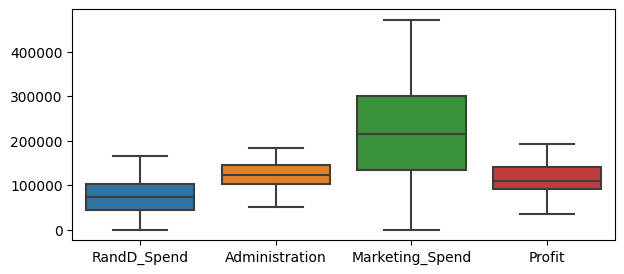

In [10]:
plt.figure(figsize=(7,3))
sns.boxplot(data=df1_50s)

#### After using IQR method we can see that their is no outlier present in the dataset.

In [11]:
##Checking correlation between both the variables:-
df1_50s.corr()

,RandD_Spend,Administration,Marketing_Spend,Profit
RandD_Spend,1.000000,0.243438,0.711654,0.978437
Administration,0.243438,1.000000,-0.037280,0.205841
Marketing_Spend,0.711654,-0.037280,1.000000,0.739307
Profit,0.978437,0.205841,0.739307,1.000000


In [12]:
##Checking null values:-
df1_50s.isnull().sum()

RandD_Spend        0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

<AxesSubplot: >

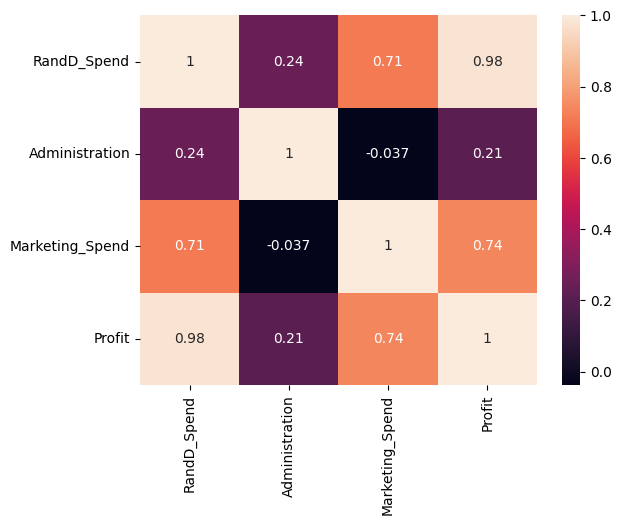

In [13]:
sns.heatmap(df1_50s.corr(),annot=True)

### Model Building 

In [14]:
model = smf.ols("Profit~RandD_Spend+Administration+Marketing_Spend",data=df1_50s).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           8.85e-32
Time:                        17:07:17   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RandD_Spend         0.7830      0.038     20.470      0.000       0.706       0.860
Administration     -0.0222      0.043     -0.518      0.607      -0.109       0.064
Marketing_Spend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
#claculating VIF(varience inflation factor) values 
rqs_rs = smf.ols("RandD_Spend~Administration+Marketing_Spend",data=df1_50s).fit().rsquared
vif_rs = 1/(1-rqs_rs)

In [16]:
rqs_ad = smf.ols("Administration~RandD_Spend+Marketing_Spend",data=df1_50s).fit().rsquared
vif_ad = 1/(1-rqs_ad)

In [17]:
rqs_ms = smf.ols("Marketing_Spend~Administration+RandD_Spend",data=df1_50s).fit().rsquared
vif_ms = 1/(1-rqs_ms)

In [18]:
col1 = {'Variable':['RandD_SPend','Administration','Marketing Spend'],
     'VIf':[vif_rs,vif_ad,vif_ms]
     }
vif_frame=pd.DataFrame(col1)
vif_frame.style.hide_index()

Variable,VIf
RandD_SPend,2.377754
Administration,1.175172
Marketing Spend,2.239957


### Test for Normality of Residuals

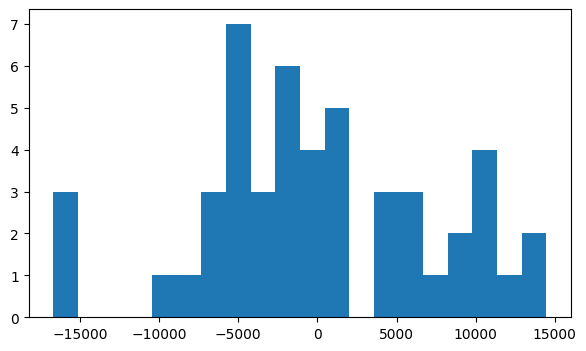

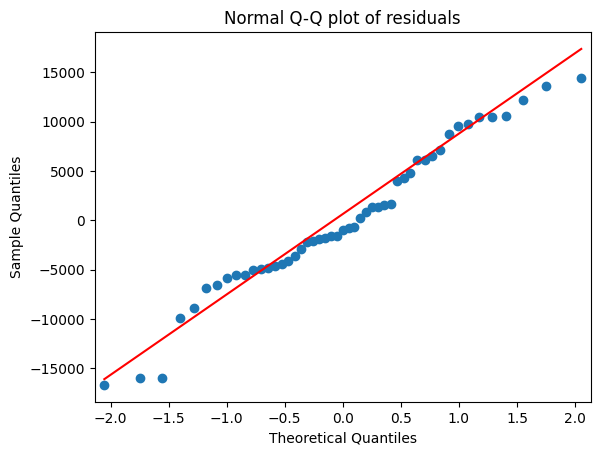

In [19]:
plt.figure(figsize=(7,4))
plt.hist(model.resid,bins=20)
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

### Residual plot for homoscedasticity

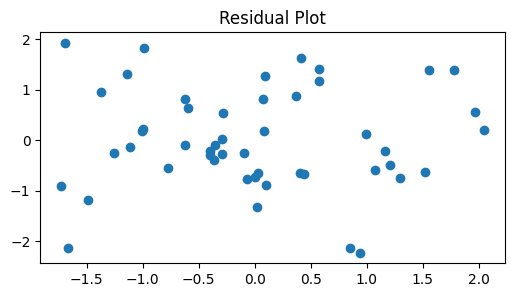

In [21]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()
plt.figure(figsize=(6,3))
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.show()

### Residual VS Regressors

eval_env: 1


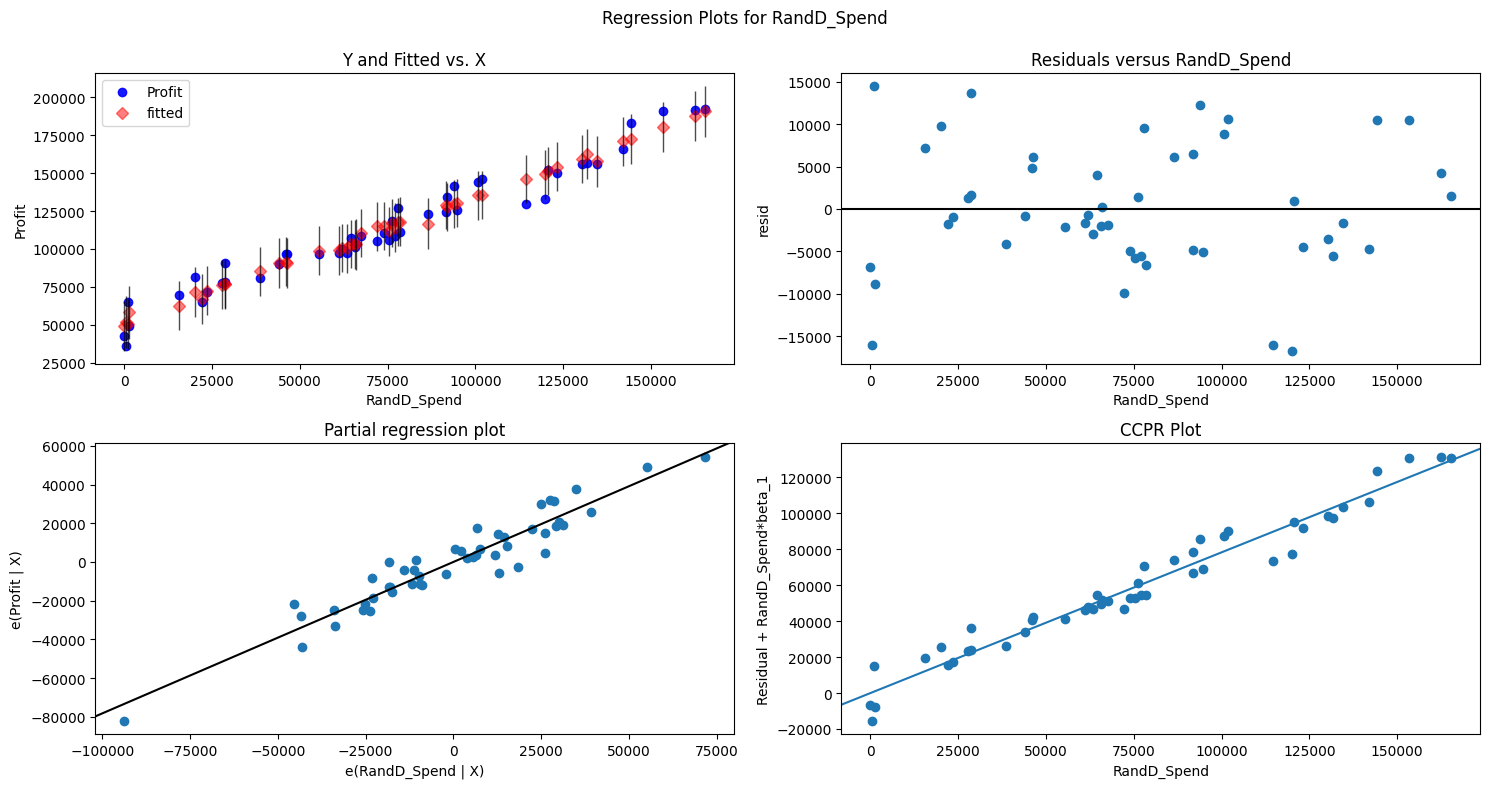

In [23]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"RandD_Spend",fig=fig)
plt.show()

eval_env: 1


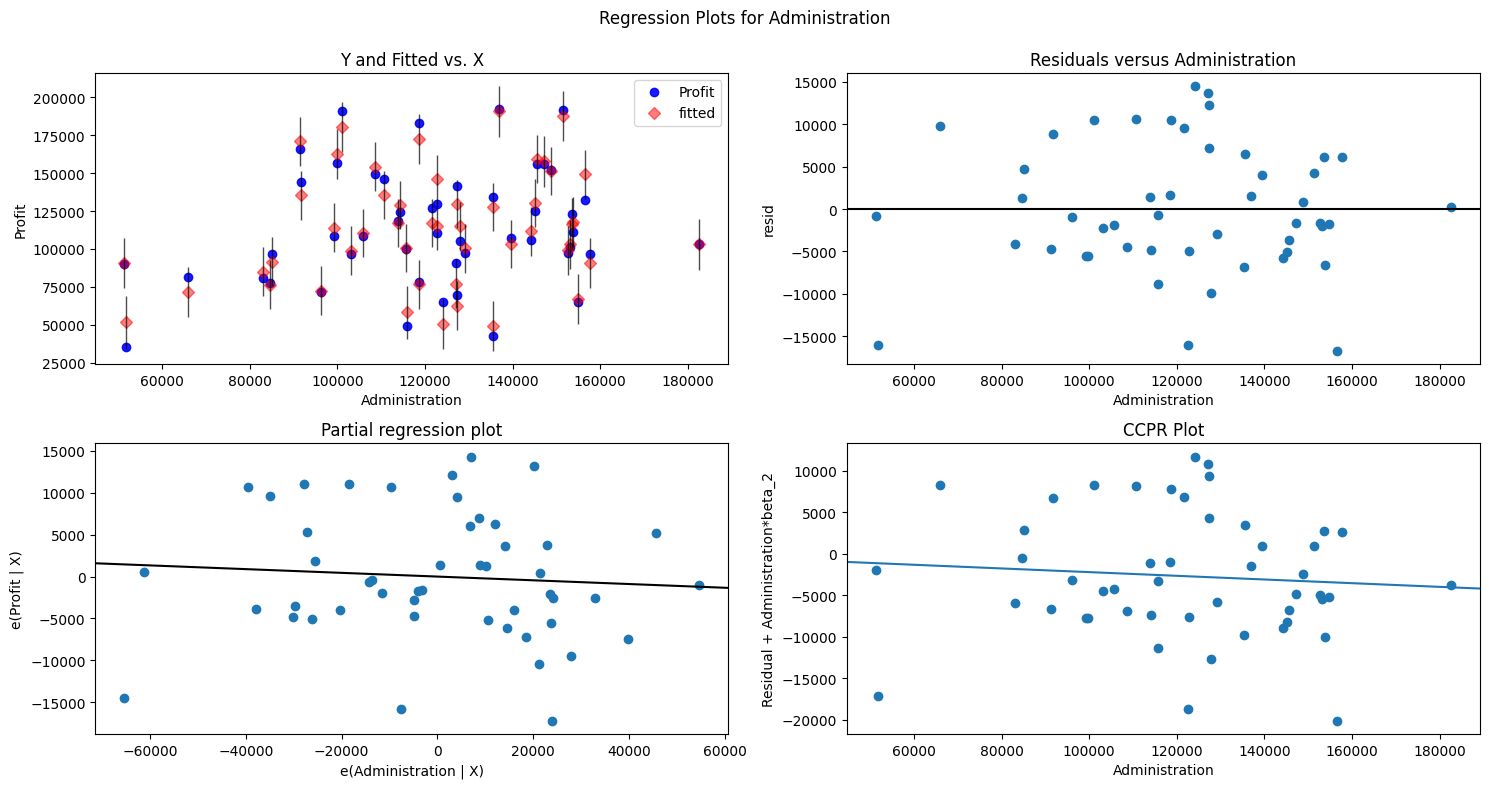

In [24]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"Administration",fig=fig)
plt.show()

eval_env: 1


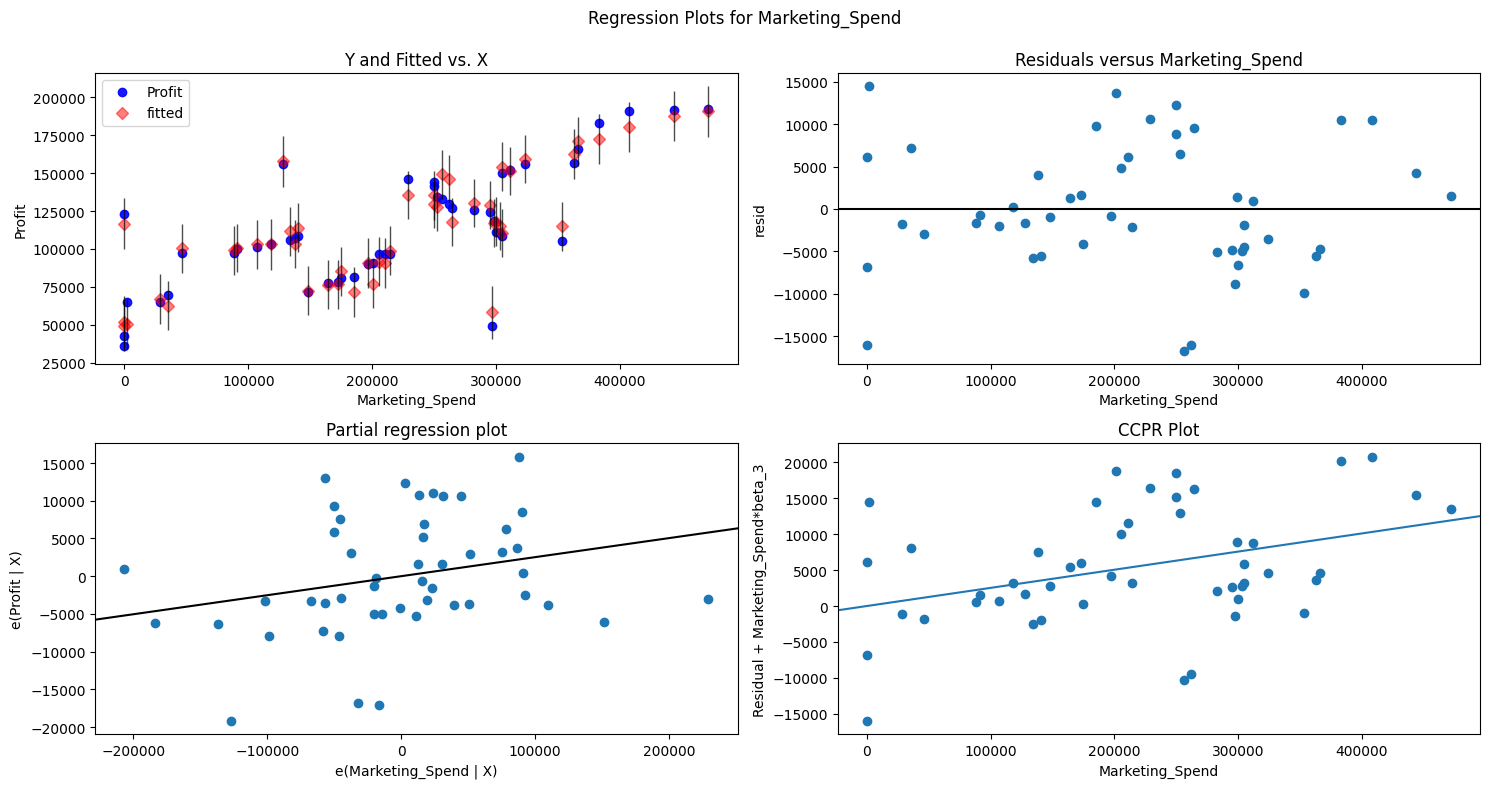

In [25]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"Marketing_Spend",fig=fig)
plt.show()

## Cook's Distance

In [26]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance
k=3
n=50
3*(k+1)/n


0.24

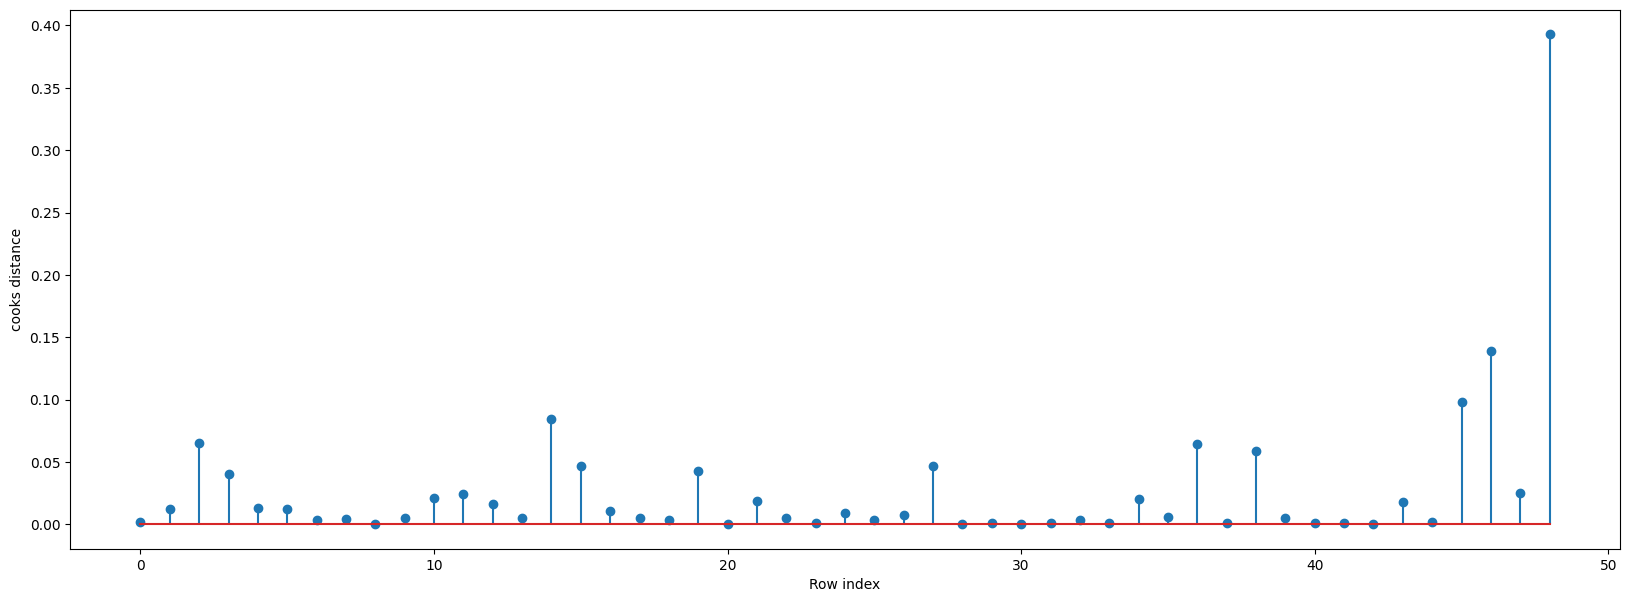

In [27]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df1_50s)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [28]:
np.where(c>0.24)

(array([48], dtype=int64),)

In [29]:
df2_50s = pd.read_csv("50_Startups.csv")
df2_50s.head()

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [30]:
df2_50s = df2_50s.drop(df2_50s.index[49],axis=0).reset_index()

In [31]:
df2_50s = df2_50s.drop(['index'],axis=1)
df2_50s.head()

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Build Model

In [32]:
final_model = smf.ols('Profit~RandD_Spend+Administration+Marketing_Spend',data=df2_50s).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           8.85e-32
Time:                        17:12:40   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RandD_Spend         0.7830      0.038     20.470      0.000       0.706       0.860
Administration     -0.0222      0.043     -0.518      0.607      -0.109       0.064
Marketing_Spend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
final_model.rsquared,final_model.aic

(0.9613162435129847, 1020.5652974526367)

In [34]:
round(final_model.predict(df2_50s[["RandD_Spend","Administration","Marketing_Spend"]]),2)

0     190716.68
1     187537.12
2     180575.53
3     172461.14
4     170863.49
5     162582.58
6     157741.34
7     159347.74
8     151328.83
9     154236.85
10    135507.79
11    135472.86
12    129355.60
13    127780.13
14    149295.40
15    145937.94
16    117437.63
17    130408.63
18    129129.23
19    116641.00
20    117097.73
21    117911.02
22    115248.22
23    110603.14
24    114051.07
25    103398.05
26    111547.64
27    114916.17
28    103027.23
29    103057.62
30    100656.41
31     99088.21
32    100325.74
33     98962.30
34     90552.31
35     91709.29
36     77080.55
37     90722.50
38     71433.02
39     85147.38
40     76625.51
41     76492.15
42     72492.39
43     62592.05
44     67025.73
45     50457.30
46     58338.44
47     49375.78
48     51658.10
dtype: float64